# Дифракция продольной волны на полуплоскости #

## Расчет в относительных единицах

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
import math

In [2]:
theta_0 = np.linspace((np.pi /180) * 5, (np.pi /180) * 85,100)
c = 5 * 1e3
f = 5e6
T = 1 / f
lambda_metal = 104.4 * 1e9 #В паскалях
mu_metal = 82. * 1e9 #В паскалях
Lambda_l = c * T #Длина продольной волны
R_0 = 0.05
x_0 = 0.01

alpha_0 = (np.pi /180) * int(input("Введите угол альфа в градусах: "))
alpha_0f = alpha_0

In [3]:
k_l = 2 * np.pi / Lambda_l #Волновое число продольной волны
k_s = np.sqrt((lambda_metal + 2 * mu_metal)/mu_metal) * k_l
k_r = k_s / 0.93
a_0f = - np.cos(alpha_0f) #Правильно
tau = k_s / k_l
nu = k_r / k_l

In [4]:
b_0f = np.linspace(0j, 1j, theta_0.shape[0])
c_0 = np.linspace(0j, 1j, theta_0.shape[0])
c_0f = np.linspace(0j, 1j, theta_0.shape[0])
r_L = np.zeros(theta_0.shape[0])
z_L = np.zeros(theta_0.shape[0])
p1 = np.linspace(0j, 1j, theta_0.shape[0])
zeta1 = np.linspace(0j, 1j, theta_0.shape[0])
gamma_Lplus1 = np.linspace(0j, 1j, theta_0.shape[0])
gamma_Sminus1 = np.linspace(0j, 1j, theta_0.shape[0])
gamma_L1 = np.linspace(0j, 1j, theta_0.shape[0])
gamma_S1 = np.linspace(0j, 1j, theta_0.shape[0])
rho1 = np.linspace(0j, 1j, theta_0.shape[0])
rho2 = np.linspace(0j, 1j, theta_0.shape[0])
f1_1 = np.linspace(0j, 1j, theta_0.shape[0])
f1_2 = np.linspace(0j, 1j, theta_0.shape[0])
R_minus1 = np.linspace(0j, 1j, theta_0.shape[0])
R_plus = np.linspace(0j, 1j, theta_0.shape[0])
R_minus = np.linspace(0j, 1j, theta_0.shape[0])
R1 = np.linspace(0j, 1j, theta_0.shape[0])
Q1_L1 = np.linspace(0j, 1j, theta_0.shape[0])
Q1_L3 = np.linspace(0j, 1j, theta_0.shape[0])
f_d1 = np.linspace(0j, 1j, theta_0.shape[0])
f_dabs1 = np.zeros(theta_0.shape[0])
f_log1 = np.zeros(theta_0.shape[0])
phi_L = np.zeros(theta_0.shape[0])

In [5]:
def Integral(tau, rho1):
    omega_array = np.arange(1 , tau , 0.005)
    Sum = 0
    d_omega = omega_array[1] - omega_array[0]
    for omega in omega_array:
        d_sum = d_omega * (math.atan((4 * omega**2 * np.sqrt((tau**2 - omega**2) * (omega**2 - - 1)))/((0.5 * tau**2 - omega**2)**2)) / (omega - rho1)) 
        Sum = Sum + d_sum 
    return Sum

In [6]:
def IntegralPlus(tau, rho1):
    omega_array = np.arange(1 , tau , 0.005)
    Sum = 0
    d_omega = omega_array[1] - omega_array[0]
    for omega in omega_array:
        d_sum = d_omega * (math.atan((4 * omega**2 * np.sqrt((tau**2 - omega**2) * (omega**2 - 1)))/((0.5 * tau**2 - omega**2)**2)) / (omega + rho1)) 
        Sum = Sum + d_sum 
    return Sum

In [7]:
for i in range(0,theta_0.shape[0]):
    
    b_0f[i] = - np.sin(alpha_0f) * np.sin(theta_0[i]) 
    
    c_0[i] = - np.sin(alpha_0) * np.cos(theta_0[i]) 
    
    c_0f[i] = - np.sin(alpha_0f) * np.cos(theta_0[i]) 
    
    z_L[i] = - R_0 * math.cos(theta_0[i])
    
    r_L[i] = np.sqrt(x_0**2 + (R_0 * math.cos(np.pi - theta_0[i]))**2)
    
    phi_L[i] = - math.atan(R_0 * math.cos(0.5 * np.pi - theta_0[i]) / x_0)  #Сомнительно но окей
    
    p1[i] = cmath.sqrt(1 - c_0[i]**2) #Правильно
    
    zeta1[i] = p1[i] * np.cos(phi_L[i]) #Правильно
    
    gamma_Lplus1[i] = cmath.sqrt(cmath.sqrt(zeta1[i]**2 + c_0f[i]**2) - 1) #Сомнительно но окей
    
    gamma_Sminus1[i] = cmath.sqrt(cmath.sqrt(zeta1[i]**2 + tau**2 * c_0[i]**2) + tau) #Сомнительно но окей
    
    rho1[i] = cmath.sqrt(zeta1[i]**2 + tau**2 * c_0[i]**2)
    
    rho2[i] = np.cos(theta_0[i]) * np.sqrt(1 + b_0f[i]**2) #Как у Н.В. Крысько
    
    gamma_S1[i] = cmath.sqrt(zeta1[i]**2 - tau**2 * (1 - c_0[i]*2))
    
    gamma_L1[i] = cmath.sqrt(zeta1[i]**2 - (1 - tau**2 * c_0[i]*2))
    
    R1[i] = (0.5 * tau**2 - (zeta1[i]**2 + tau**2 * c_0[i]**2))**2 - (zeta1[i]**2 - (1 - tau**2 * c_0[i]**2)) * gamma_L1[i] * gamma_S1[i]
    
    R_plus[i] = np.sqrt(2) * np.sqrt(tau**2 - 1) * (nu - rho2[i]) * np.exp(-1 * IntegralPlus(tau, rho2[i].real) / np.pi)
    
    R_minus[i] = R1[i] / R_plus[i]
    
    #R_minus1[i] = np.sqrt(2) * np.sqrt(tau**2 - 1) * (nu + rho1[i]) * np.exp(-1 * Integral(tau, rho1[i].real) / np.pi)
    
    f1_1[i] = (0.5 * tau**2 - zeta1[i]**2 - tau**2 * c_0[i]**2) / (R_minus[i] * gamma_Lplus1[i] * (zeta1[i] + a_0f))
    
    f1_2[i] = (gamma_Sminus1[i]) / (R_minus[i] * (zeta1[i] + a_0f))
    
    Q1_L1[i] = - 1j * (0.5 * tau**2 - (1 - b_0f[i]**2)) / np.sqrt(2 * np.pi)
    
    Q1_L3[i] = - 1j * (b_0f[i] * (a_0f**2 + tau**2 * c_0[i]**2) ) / np.sqrt(2 * np.pi)
    
    f_d1[i] = ( cmath.sqrt(p1[i]) / (np.sqrt(tau**2 - 1) * np.sqrt(tau + a_0f)) ) * (- Q1_L1[i] * f1_1[i] + 1j * Q1_L3[i] * f1_2[i]) * (np.sin(phi_L[i]) * (1 / np.sqrt(r_L[i])) * cmath.exp(1j * (k_l * p1[i] * r_L[i] + k_l * c_0f[i] * z_L[i]) - 1j * np.pi / 4))
    
    f_dabs1[i] = np.sqrt(f_d1[i].imag**2 + f_d1[i].real**2)
    
for j in range(0,theta_0.shape[0]):
    
    f_log1[j] = 10 * math.log10(f_dabs1[j] /f_dabs1.max())

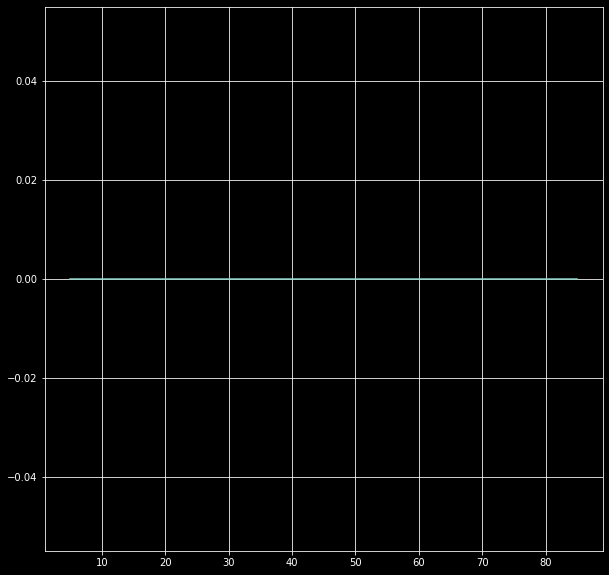

In [8]:
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(theta_0 * (180 / np.pi), Q1_L1.real)